In [1]:
from tools import *

In [50]:
csv =pd.read_csv(r"C:\Users\cjang.WILDCAT\Desktop\eis\test", names = ['name', 'recal_indices', 'mask_choice'],index_col = 0, sep = " ", header = None)

In [51]:
csv.head()

,recal_indices,mask_choice
name,,
DE_104_10_30.mpt,[1],"[301.10504,39341.6554183904,0.0164047936644424..."
DE_49_5_30.mpt,NaN,1;
DE_40_8_60.mpt,"[2,1,0]","[43.7194276236431,147.21613849808,-38.42330064..."


In [52]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])

No handles with labels found to put in legend.


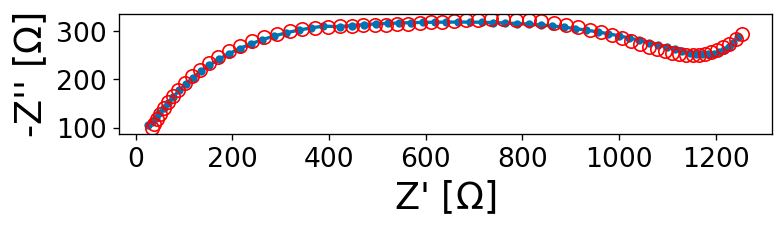

file    fit_Rs      fit_R1    fit_n1  fit_fs1        fit_Q1  \
0  DE_49_5_30.mpt  0.026666  690.801523  0.778958      NaN  2.228366e-07   

       fit_R2    fit_n2  fit_fs2        fit_Q2    fit_Q3    fit_n3  
0  460.671523  0.912333      NaN  7.652352e-09  0.000015  0.659293  


In [65]:
for i in range(1,len(csv)):
    mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name])
    if len((csv.iloc[i].mask_choice.strip('[')).strip('];')) == 1:
        if (csv.iloc[i].mask_choice.strip('[')).strip('];') == "1":
            mask_choice = mpt.fast_mask()
            masked_mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\eis\EIS_Manager\data\\', data = [csv.iloc[1].name], mask = mask_choice)
            print(masked_mpt.guesser())
            #print(len(masked_mpt.df[0]))
    
    else:


range(0, 2)